## Problem statement

We have been given a dataset which includes variaous data(variables) for giving loan. 
The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

#### To determine the variables which are strong indicators of default. We will use EDA (Exploratory Data Analysis) for this.

In [419]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from datetime import datetime
from dateutil import parser

#### EDA Step 1: Data sourcing

In [420]:
# Loading data in data frame
loan_df = pd.read_csv("loan.csv", header=0, low_memory=False)
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [421]:
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [422]:
loan_df.shape

(39717, 111)

In [423]:
loan_df.title

0                         Computer
1                             bike
2             real estate business
3                         personel
4                         Personal
                   ...            
39712             Home Improvement
39713    Retiring credit card debt
39714       MBA Loan Consolidation
39715                     JAL Loan
39716           Consolidation Loan
Name: title, Length: 39717, dtype: object

In [424]:
# Lets describe the data
loan_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [425]:
loan_df.value_counts

<bound method DataFrame.value_counts of             id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ...  \
0       36 months   10.65%       162.87     B        B2

##### We can see there are many NaN values. Lets deal with them in step 2.

#### EDA Step 2: Data Cleaning

In [426]:
# Lets remove the variable which has only NA 
loan_df.dropna(how='all', axis='columns', inplace=True)

In [427]:
loan_df.shape

(39717, 57)

##### So the updated number of columns are now 57

In [428]:
# Lets look at the data again
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


##### Lets determine the columns which won't affect the analysis
- Reasons can be
    - They have same values
    - They dont affect the analysis like id, member_id, emp_title, pymnt_plan etc
    - Some variable may not be avaiable at the time of loan processing
    - some variables like funded_amnt which reviewer says but actual value is given by funded_amnt_inv

In [429]:
# to get all unique count of records across the dataframe.
loan_df.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26526
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

In [430]:
# Lets check which variables have the same value across records.
# We will drop these columns as they won't affect the analysis.
columns_to_drop = loan_df.nunique()[loan_df.nunique() == 1].index.tolist()
columns_to_drop

['pymnt_plan',
 'initial_list_status',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

In [431]:
loan_df.drop(columns_to_drop, axis = 1, inplace = True)
loan_df.shape

(39717, 48)

##### So the updated number of columns are now 48

In [432]:
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

In [433]:
# Now lets check the variable which wont affect the analysis
# for all records urls are different, even desc is almost different.
# collection_recovery_fee is post charged off fees
# inq_last_6mths is just enquiry
# similarly others by looking at the data dictionary and records.
columns_to_drop = ['id', 'member_id', 'url', 'desc', 'zip_code', 'inq_last_6mths',
                   'earliest_cr_line', 'out_prncp', 'out_prncp_inv',
                   'total_rec_prncp', 'total_rec_int', 'total_pymnt_inv',
                   'recoveries', 'last_pymnt_d', 'last_pymnt_amnt', 
                   'last_credit_pull_d', 'funded_amnt', 'emp_title', 'total_pymnt',
                   'total_rec_late_fee', 'collection_recovery_fee'
                  ]

In [434]:
# dropping above cloumns
loan_df.drop(columns_to_drop, axis = 1, inplace = True)

In [435]:
loan_df.shape

(39717, 27)

##### So the updated number of columns are now 29

In [436]:
# Lets look at the columns
loan_df.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'addr_state', 'dti', 'delinq_2yrs', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'next_pymnt_d', 'pub_rec_bankruptcies'],
      dtype='object')

In [437]:
# Now lets clean up/ modify few columns based on % missing data
missing_data = (loan_df.isna().sum()/len(loan_df.index))*100

cols_gt_90_percent = []
for k,v in missing_data.items():
    if v > 90:
        # eliminating considering rows with more than 90 
        cols_gt_90_percent.append(k)

loan_df.drop(cols_gt_90_percent, axis = 1, inplace = True)

In [438]:
loan_df.shape

(39717, 25)

In [439]:
# Lets relook at the columns
loan_df.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'addr_state', 'dti', 'delinq_2yrs', 'mths_since_last_delinq',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

##### So the updated number of columns are now 27

In [440]:
# Lets operate on records/rows

# We can get rid of loan_status = "current" as we can't predict the behaviour using current.
loan_df = loan_df[loan_df.loan_status != "Current"]

In [441]:
loan_df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,addr_state,dti,delinq_2yrs,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,...,AZ,27.65,0,NaN,3,0,13648,83.70%,9,0.0
1,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,...,GA,1.00,0,NaN,3,0,1687,9.40%,4,0.0
2,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,...,IL,8.72,0,NaN,2,0,2956,98.50%,10,0.0
3,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,...,CA,20.00,0,35.0,10,0,5598,21%,37,0.0
5,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,...,AZ,11.20,0,NaN,9,0,7963,28.30%,12,0.0


In [442]:
loan_df.shape

(38577, 25)

#### Lets try to clean rows with words like 'months', '%' etc.

In [443]:
# Removing months word from term column
loan_df['term'] = list(map(lambda a:a.split(' ')[1], loan_df['term']))

/var/folders/n5/s28crk4x6gdf2lsjg7p_5nkr0000gn/T/ipykernel_1772/4112492399.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_df['term'] = list(map(lambda a:a.split(' ')[1], loan_df['term']))


In [444]:
loan_df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,addr_state,dti,delinq_2yrs,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,5000,4975.0,36,10.65%,162.87,B,B2,10+ years,RENT,24000.0,...,AZ,27.65,0,NaN,3,0,13648,83.70%,9,0.0
1,2500,2500.0,60,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,...,GA,1.00,0,NaN,3,0,1687,9.40%,4,0.0
2,2400,2400.0,36,15.96%,84.33,C,C5,10+ years,RENT,12252.0,...,IL,8.72,0,NaN,2,0,2956,98.50%,10,0.0
3,10000,10000.0,36,13.49%,339.31,C,C1,10+ years,RENT,49200.0,...,CA,20.00,0,35.0,10,0,5598,21%,37,0.0
5,5000,5000.0,36,7.90%,156.46,A,A4,3 years,RENT,36000.0,...,AZ,11.20,0,NaN,9,0,7963,28.30%,12,0.0


In [445]:
# Removing % from int_rate and converting result to a float
loan_df['int_rate'] = list(map(lambda a:float(a.split('%')[0]), loan_df['int_rate']))

/var/folders/n5/s28crk4x6gdf2lsjg7p_5nkr0000gn/T/ipykernel_1772/2093891127.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_df['int_rate'] = list(map(lambda a:float(a.split('%')[0]), loan_df['int_rate']))


In [446]:
loan_df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,addr_state,dti,delinq_2yrs,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,5000,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,24000.0,...,AZ,27.65,0,NaN,3,0,13648,83.70%,9,0.0
1,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,...,GA,1.00,0,NaN,3,0,1687,9.40%,4,0.0
2,2400,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,12252.0,...,IL,8.72,0,NaN,2,0,2956,98.50%,10,0.0
3,10000,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,49200.0,...,CA,20.00,0,35.0,10,0,5598,21%,37,0.0
5,5000,5000.0,36,7.90,156.46,A,A4,3 years,RENT,36000.0,...,AZ,11.20,0,NaN,9,0,7963,28.30%,12,0.0


In [447]:
# Lets get columns to see if we need to fill them with some values
loan_df.isna().sum() 

loan_amnt                     0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                 1033
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
title                        11
addr_state                    0
dti                           0
delinq_2yrs                   0
mths_since_last_delinq    24905
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   50
total_acc                     0
pub_rec_bankruptcies        697
dtype: int64

In [448]:
# emp_length and pub_rec_bankruptcies is a categorical variable
# Lets take mode to fill na values
loan_df['emp_length'].fillna(loan_df['emp_length'].mode()[0], inplace = True)
loan_df['pub_rec_bankruptcies'].fillna(loan_df['pub_rec_bankruptcies'].mode()[0], inplace = True)

/var/folders/n5/s28crk4x6gdf2lsjg7p_5nkr0000gn/T/ipykernel_1772/3162404913.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_df['emp_length'].fillna(loan_df['emp_length'].mode()[0], inplace = True)
/var/folders/n5/s28crk4x6gdf2lsjg7p_5nkr0000gn/T/ipykernel_1772/3162404913.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_df['emp_

In [449]:
# Lets see the data for 'NA' again
loan_df.isna().sum() 

loan_amnt                     0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
title                        11
addr_state                    0
dti                           0
delinq_2yrs                   0
mths_since_last_delinq    24905
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   50
total_acc                     0
pub_rec_bankruptcies          0
dtype: int64

In [450]:
loan_df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,addr_state,dti,delinq_2yrs,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,5000,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,24000.0,...,AZ,27.65,0,NaN,3,0,13648,83.70%,9,0.0
1,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,...,GA,1.00,0,NaN,3,0,1687,9.40%,4,0.0
2,2400,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,12252.0,...,IL,8.72,0,NaN,2,0,2956,98.50%,10,0.0
3,10000,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,49200.0,...,CA,20.00,0,35.0,10,0,5598,21%,37,0.0
5,5000,5000.0,36,7.90,156.46,A,A4,3 years,RENT,36000.0,...,AZ,11.20,0,NaN,9,0,7963,28.30%,12,0.0


In [451]:
# Lets treat missing values in title.
loan_df.title.value_counts()

title
Debt Consolidation           2090
Debt Consolidation Loan      1620
Personal Loan                 641
Consolidation                 491
debt consolidation            478
                             ... 
Murray Loan                     1
Need debt consolidation!        1
freedom2                        1
DAVE WEDDING                    1
JAL Loan                        1
Name: count, Length: 19297, dtype: int64

In [452]:
# Actually it doesn't seem a good indicator of being default in our analysis.
# So dropping this column.
loan_df.drop(columns=['title'], inplace=True)

/var/folders/n5/s28crk4x6gdf2lsjg7p_5nkr0000gn/T/ipykernel_1772/1755224537.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_df.drop(columns=['title'], inplace=True)


In [453]:
# Lets check mths_since_last_delinq variable
# This is an important variable but it has almost 65% missing data (24905/38577 ~ 64.56%)
# two options here - either drop this variable or fill with mode since its a categorical variable
# we are filling with mode since we have already filtered columns with > 90 % NA values
loan_df['mths_since_last_delinq'].fillna(loan_df['mths_since_last_delinq'].mode()[0], inplace = True)

/var/folders/n5/s28crk4x6gdf2lsjg7p_5nkr0000gn/T/ipykernel_1772/3002689545.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_df['mths_since_last_delinq'].fillna(loan_df['mths_since_last_delinq'].mode()[0], inplace = True)
/var/folders/n5/s28crk4x6gdf2lsjg7p_5nkr0000gn/T/ipykernel_1772/3002689545.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

In [454]:
# Lets look at revol_util variable now
loan_df.revol_util.value_counts()
# As the number of entries for this variable is very less ~ .13% (50/38577), so drorrping such records
loan_df = loan_df.dropna(subset=['revol_util'])

In [455]:
# Lets check the records again for any missing values
loan_df.isna().sum() 

loan_amnt                 0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_length                0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
addr_state                0
dti                       0
delinq_2yrs               0
mths_since_last_delinq    0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util                0
total_acc                 0
pub_rec_bankruptcies      0
dtype: int64

In [456]:
# Lets also check shape of the data frame after cleanup
loan_df.shape

(38527, 24)

### At this time, looks like we have cleaned the required variables and records.

#### EDA Step 3 - Derived Metrics

In [457]:
# Lets extract year and month from issue_d
loan_df['issue_d'] = pd.to_datetime(loan_df['issue_d'].apply(lambda x: datetime.strptime(x,'%b-%y'))).dt.strftime('%m-%Y')
loan_df['issue_d_year'] = pd.DatetimeIndex(loan_df['issue_d']).year
loan_df['issue_d_month'] = pd.DatetimeIndex(loan_df['issue_d']).month

# Removing issue_d now
loan_df.drop(columns=['issue_d'], inplace=True)

In [458]:
loan_df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,delinq_2yrs,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,issue_d_year,issue_d_month
0,5000,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,24000.0,...,0,0.0,3,0,13648,83.70%,9,0.0,2011,12
1,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,...,0,0.0,3,0,1687,9.40%,4,0.0,2011,12
2,2400,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,12252.0,...,0,0.0,2,0,2956,98.50%,10,0.0,2011,12
3,10000,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,49200.0,...,0,35.0,10,0,5598,21%,37,0.0,2011,12
5,5000,5000.0,36,7.90,156.46,A,A4,3 years,RENT,36000.0,...,0,0.0,9,0,7963,28.30%,12,0.0,2011,12


In [459]:
loan_df.shape

(38527, 25)

In [460]:
# Lets check if funded_amnt_inv has any wrong data.
loan_df[loan_df['funded_amnt_inv'] == 0].count()

loan_amnt                 128
funded_amnt_inv           128
term                      128
int_rate                  128
installment               128
grade                     128
sub_grade                 128
emp_length                128
home_ownership            128
annual_inc                128
verification_status       128
loan_status               128
purpose                   128
addr_state                128
dti                       128
delinq_2yrs               128
mths_since_last_delinq    128
open_acc                  128
pub_rec                   128
revol_bal                 128
revol_util                128
total_acc                 128
pub_rec_bankruptcies      128
issue_d_year              128
issue_d_month             128
dtype: int64

In [461]:
# So we have 128 records which has funded_amnt_inv as 0.
# Now these records doesn't seems correct becuase they won't have any int rate.
# may be there are fully paid loan or charged off. But this won't help us in analysis.
# Lets get rid of such records.
loan_df = loan_df[loan_df['funded_amnt_inv'] != 0]

In [462]:
loan_df.shape

(38399, 25)

In [463]:
# Converting defaulter to a boolean value 0 or 1. 
loan_df['defaulter'] = [0 if x == 'Fully Paid' else 1 for x in loan_df['loan_status']]

### EDA Step 3: Univariate Analysis

In [464]:
# Lets check variables to operate on
loan_df.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'purpose', 'addr_state', 'dti',
       'delinq_2yrs', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'pub_rec_bankruptcies',
       'issue_d_year', 'issue_d_month', 'defaulter'],
      dtype='object')

#### Finding outliers

<Axes: title={'center': 'boxplot for loan_amnt & funded_amnt_inv'}>

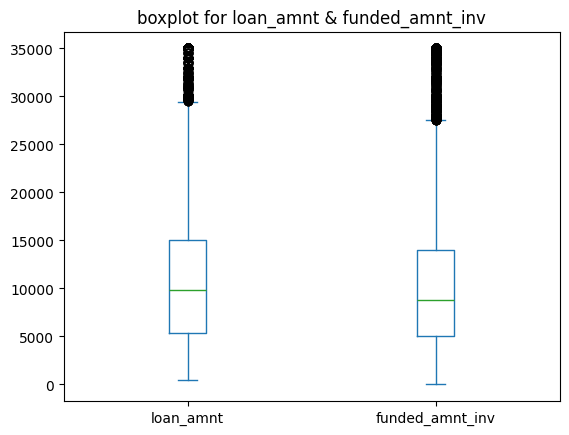

In [465]:
# Lets check if loan_amnt and funded_amnt_inv has any outliers
loan_df[['loan_amnt', 'funded_amnt_inv']].plot(kind='box', title='boxplot for loan_amnt & funded_amnt_inv')

In [466]:
# Data seems fine for loan_amnt and funded_amnt_inv and in general a continuous trend.
# Lets move on to next variable - int_rate

<Axes: title={'center': 'boxplot for int_rate'}>

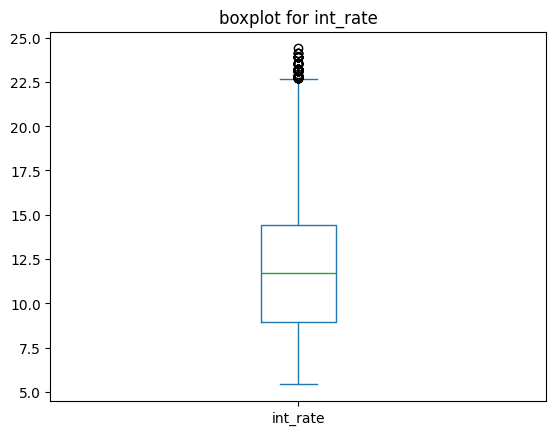

In [467]:
loan_df[['int_rate']].plot(kind='box', title='boxplot for int_rate')

<Axes: title={'center': 'boxplot for dti'}>

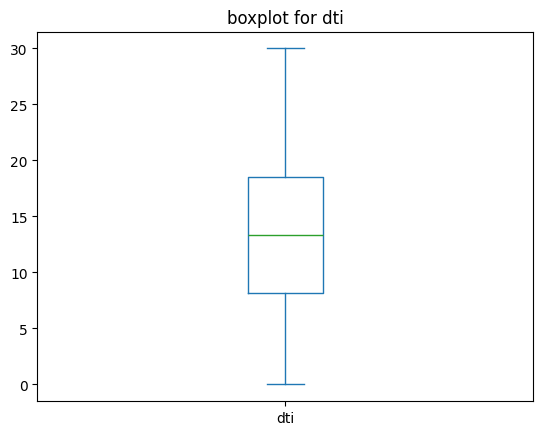

In [468]:
# Here also data look fine.
# So check next variable - dti
loan_df[['dti']].plot(kind='box', title='boxplot for dti')

In [469]:
# this for sure has no outlier.
# So lets check next variable - annual_inc

<Axes: title={'center': 'boxplot for annual_inc'}>

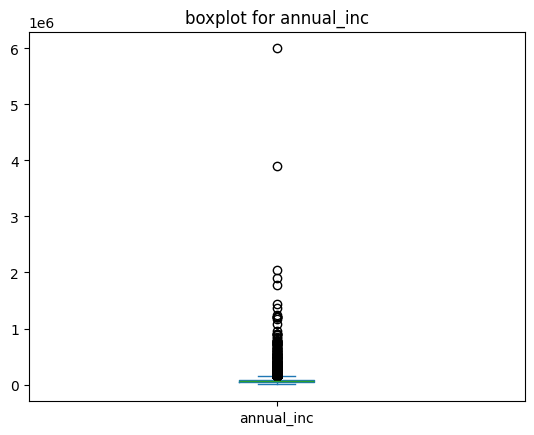

In [470]:
loan_df[['annual_inc']].plot(kind='box',title='boxplot for annual_inc' )

In [471]:
# This data seems to have outliers.
loan_df['annual_inc'].describe()

count    3.839900e+04
mean     6.884650e+04
std      6.425606e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.900000e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [472]:
# Lets remove the outliers records
outlier_range = [0, 0.2, 0.4, 0.6, 0.8, 1]
loan_df.annual_inc.quantile(outlier_range)

0.0       4000.0
0.2      37200.0
0.4      50004.0
0.6      65299.2
0.8      90000.0
1.0    6000000.0
Name: annual_inc, dtype: float64

In [473]:
# Looks like range between .8 to 1 is quite high
# so lets use more granular range in between them 
outlier_range = [0, 0.2, 0.4, 0.6, 0.8, 0.9, 0.95, 1]
loan_df.annual_inc.quantile(outlier_range)

0.00       4000.0
0.20      37200.0
0.40      50004.0
0.60      65299.2
0.80      90000.0
0.90     115200.0
0.95     140004.0
1.00    6000000.0
Name: annual_inc, dtype: float64

In [474]:
# Lets consider .95 or 95% to remove data. Basically we need to remove such records.
annual_inc_outlier_quantile_data = loan_df.annual_inc.quantile(0.95)
loan_df = loan_df[loan_df.annual_inc <= annual_inc_outlier_quantile_data]

In [475]:
loan_df.shape

(36482, 26)

### EDA: Bivariate Analysis

Text(0, 0.5, 'Count')

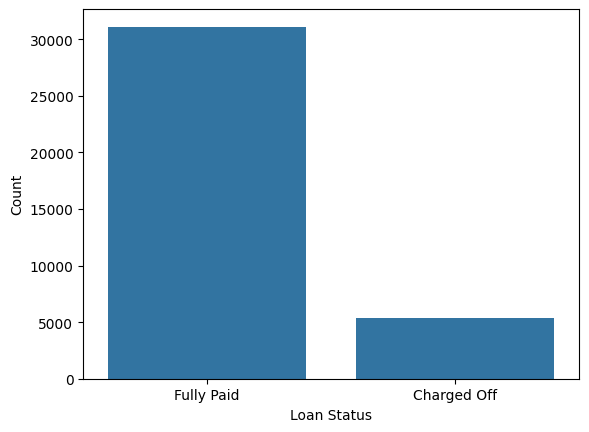

In [476]:
# Here the target variable is loan_status. So lets compare others with this.
# Lets look at the data for loan_status
sns.countplot(x = 'loan_status', data = loan_df)
plt.xlabel('Loan Status')
plt.ylabel('Count')

In [477]:
# create_feature_bins will create a new feature group for a feature in dataframe
def create_feature_bins(df, var_type):
    # For some fields like emp_length, term etc we already have bins but for other making now
    group_attribute = ""
    if (var_type == 'funded_amnt_inv'):
        df['funded_amnt_inv_groups'] = pd.cut(loan_df['funded_amnt_inv'], bins=8, precision=0, 
                                       labels =['0-5000', '5001-10000', '10001-15000', '15001-20000', '20001-25000', 
                                        '25001-30000', '30001-35000', '35000-40000'])
        group_attribute = 'funded_amnt_inv_groups'
        
    elif (var_type == 'loan_amnt'):
        df['loan_amount_groups'] = pd.cut(loan_df['loan_amnt'], bins=8, precision=0, 
                                       labels =['0-5000', '5001-10000', '10001-15000', '15001-20000', '20001-25000', 
                                        '25001-30000', '30001-35000', '35000-40000'])
        group_attribute = 'loan_amount_groups'
        
    elif (var_type == 'int_rate'):
        df['int_rate_groups'] = pd.cut(loan_df['int_rate'], bins=5, precision=0, 
                                       labels =['0-5', '6-10', '11-15', '16-20', '21-25'])
        group_attribute = 'int_rate_groups'
        
    elif(var_type == 'annual_inc'):
        df['annual_inc_groups'] = pd.cut(loan_df['annual_inc'], bins=8, precision=0, 
                                       labels =['0-20000', '20001-40000','40001-60000', '60001-80000',
                                                '80001-100000', '100001-120000', '120001-140000','140001-160000'])
        group_attribute = 'annual_inc_groups'
        
    elif(var_type == 'dti'):
        df['dti_groups'] =   pd.cut(loan_df['dti'], bins=6, precision=0,
                                   labels =['0-5', '6-10', '11-15', '16-20', '21-25', '26-30']) 
        group_attribute = 'dti_groups'
        
    return group_attribute

In [478]:
# plt_graph is a generic function which will be used to draw various plots
def plt_graph(df, x_var, x_label, title, hue_var=None, rot_flag=0, fig_size_x=14, fig_size_y=8):
    
    num_records = len(df)
    dims = (fig_size_x,fig_size_y)
    plt.figure(figsize=dims)
    ax = sns.countplot(x=x_var, data=df,hue=hue_var,palette="Set3")
    plt.title(title)
    plt.xlabel(x_label)

    ax.yaxis.tick_left()
    ax.yaxis.tick_right()
    
    if(rot_flag==1):
        ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=12)
        plt.tight_layout()
    ax.set_ylabel('Frequency [%]')

    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/num_records), (x.mean(), y), 
                ha='center', va='bottom') 

    
    ax.grid(None)

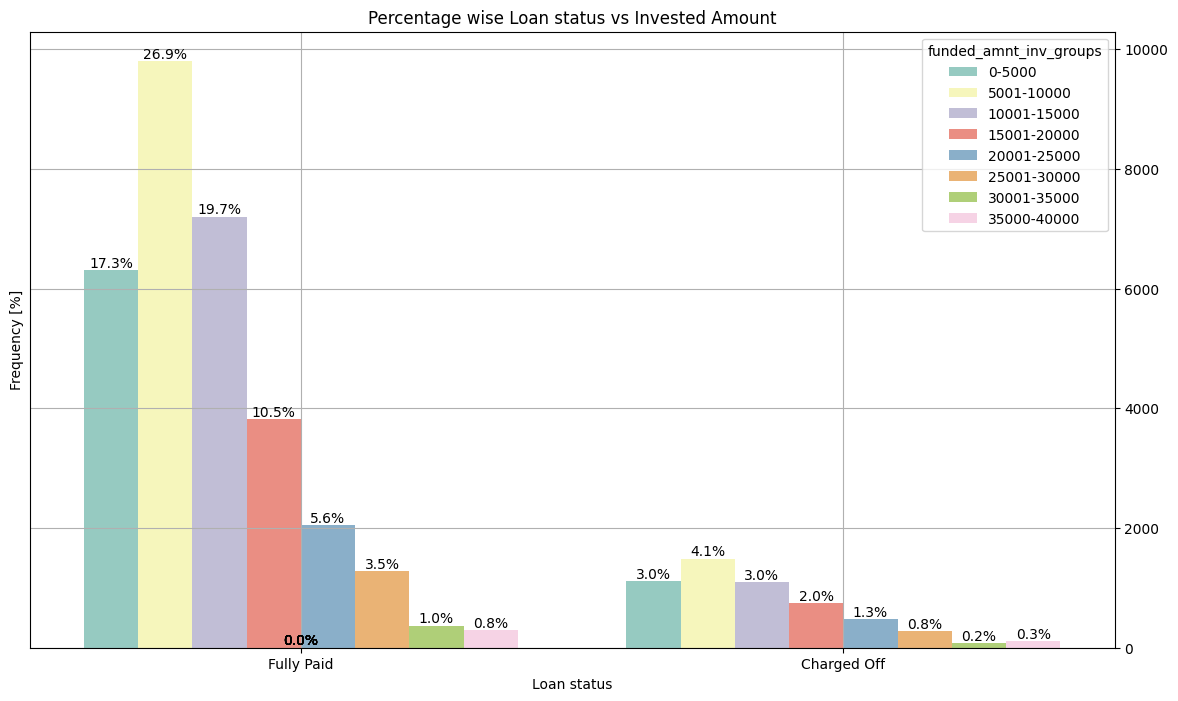

In [479]:
# Lets analyze funded_amnt_inv against loan_status
group_attribute = create_feature_bins(loan_df, 'funded_amnt_inv')
plt_graph(loan_df, "loan_status",'Loan status','Percentage wise Loan status vs Invested Amount', group_attribute)

#### So we see if funded_amnt_inv is between 5001-10000 then chances of being defaulter (Charged Off) is high.

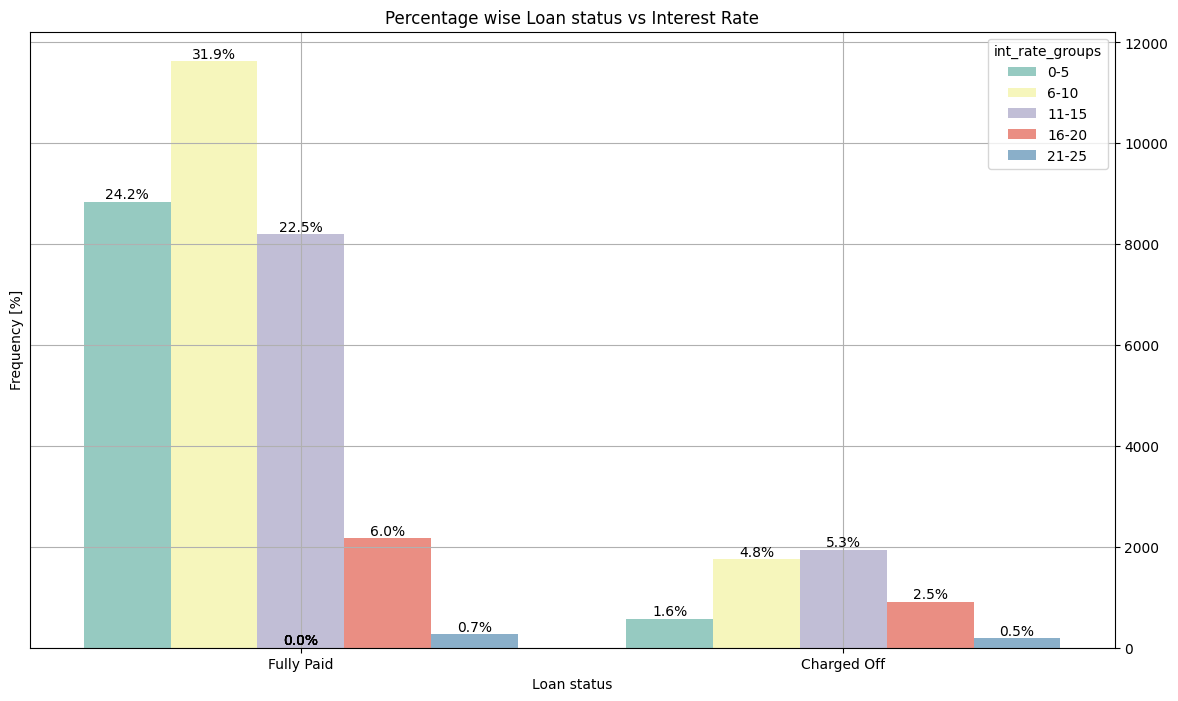

In [480]:
# Lets analyze int_rate against loan_status
group_attribute = create_feature_bins(loan_df, 'int_rate')
plt_graph(loan_df, "loan_status",'Loan status','Percentage wise Loan status vs Interest Rate', group_attribute)

### So we see if int_rate rate is in range of 11% to 15% then chances of being defaulter (Charged Off) is high.

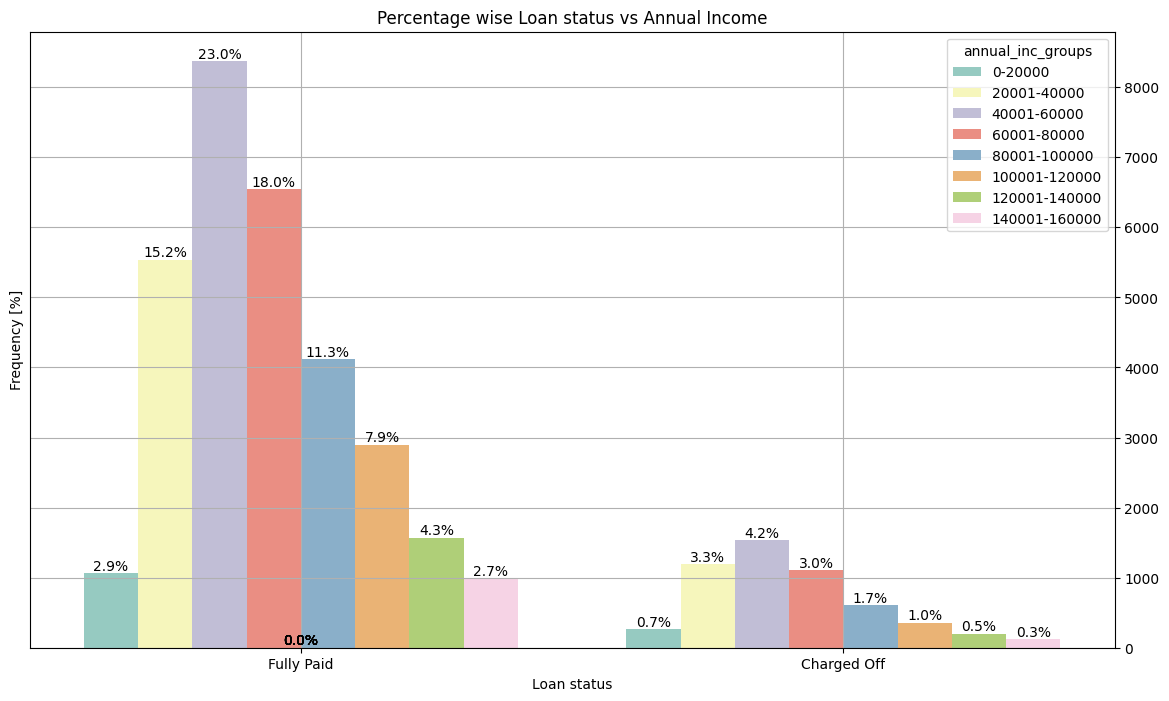

In [481]:
# Lets analyze annual_inc against loan_status
group_attribute = create_feature_bins(loan_df, 'annual_inc')
plt_graph(loan_df, "loan_status",'Loan status','Percentage wise Loan status vs Annual Income', group_attribute)

### So we see if annual_inc is in range of 40001 to 60000 then chances of being defaulter (Charged Off) is high.

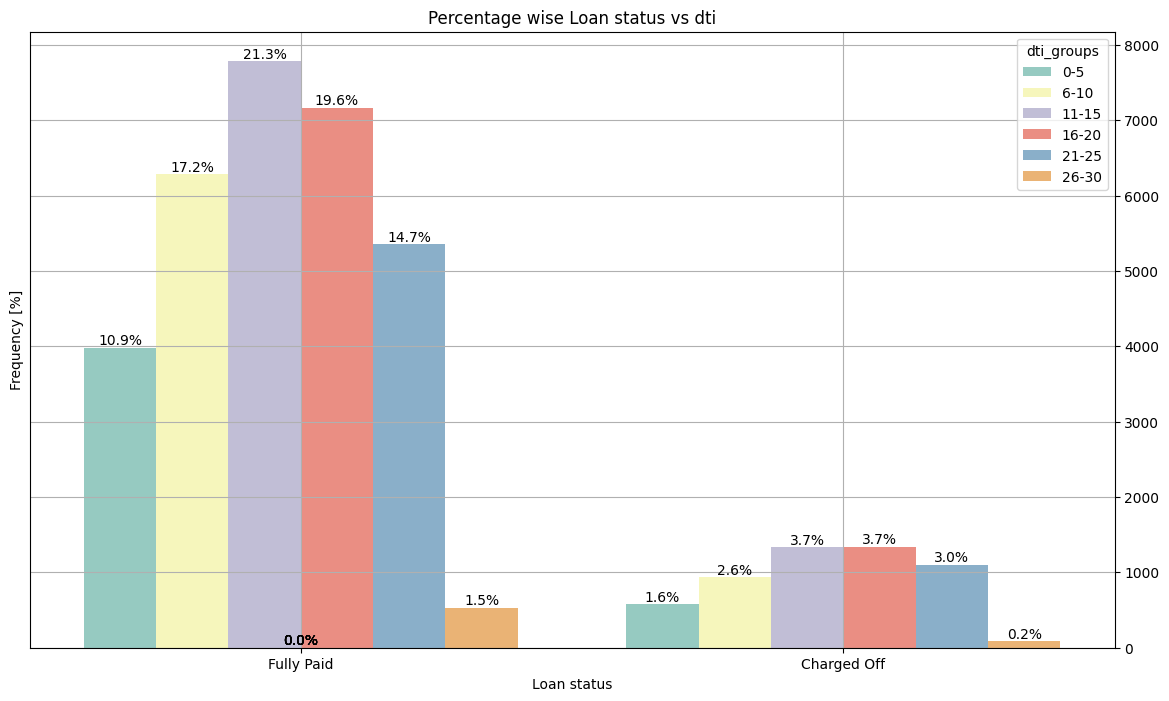

In [482]:
# Lets analyze dti against loan_status
group_attribute = create_feature_bins(loan_df, 'dti')
plt_graph(loan_df, "loan_status",'Loan status','Percentage wise Loan status vs dti', group_attribute)  

### So we see if dti is in range of either 11-15 or 16-20 then chances of becoming defaulter is high. 

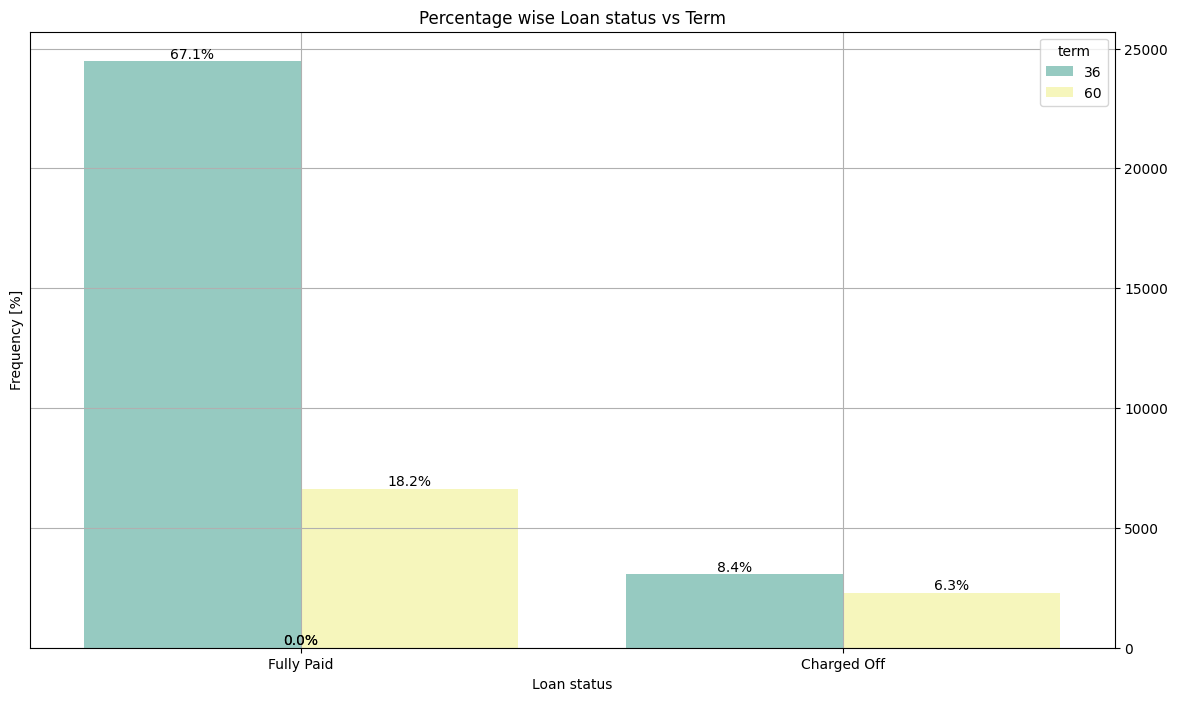

In [483]:
# Lets analyze term against loan_status
plt_graph(loan_df, "loan_status",'Loan status','Percentage wise Loan status vs Term','term')

### So we see if term is 36 months then chances of becoming defaulter is much higher. 

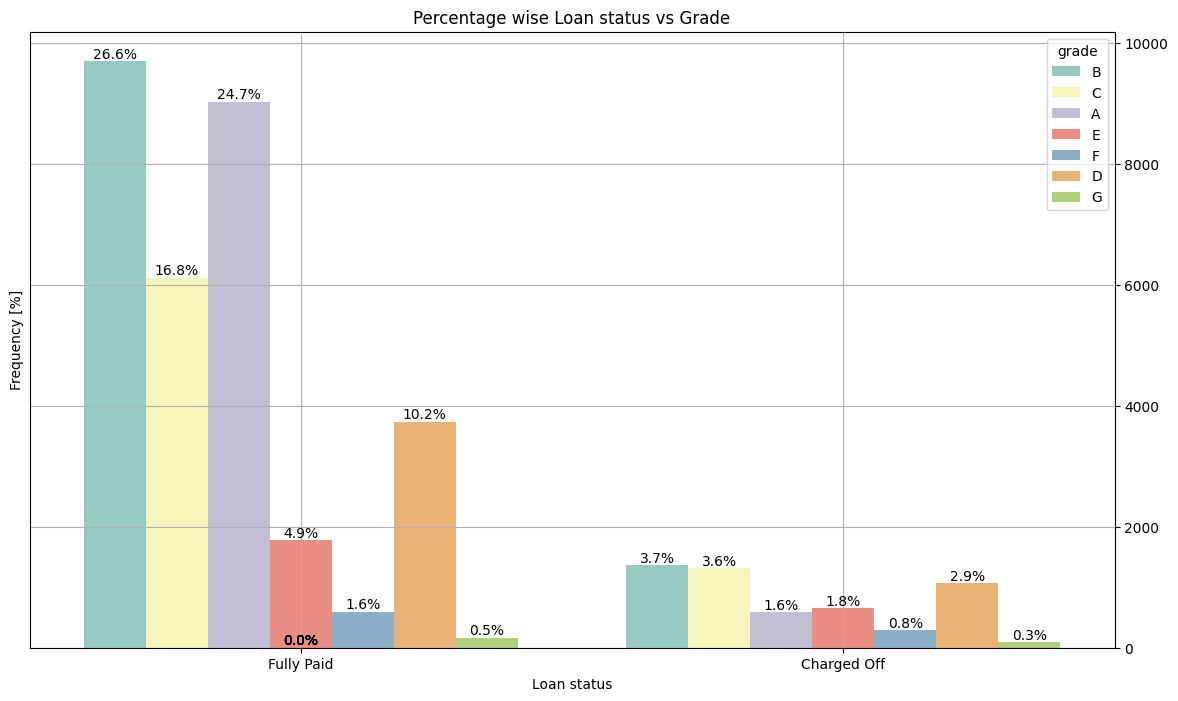

In [484]:
# Analyzing grade against loan_status
plt_graph(loan_df, "loan_status",'Loan status','Percentage wise Loan status vs Grade','grade')   

### So we see if grade is B or C then chances of becoming defaulter is higher.

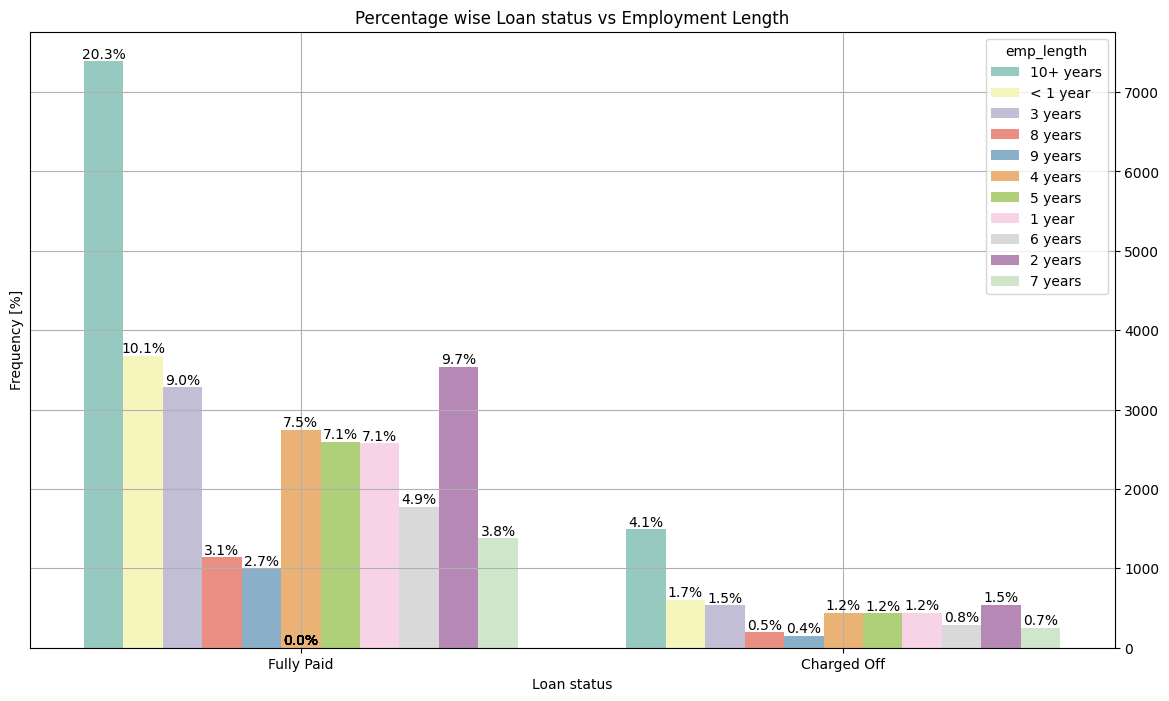

In [485]:
# Analyzing Employment Length against loan_status
plt_graph(loan_df, "loan_status",'Loan status','Percentage wise Loan status vs Employment Length','emp_length')   

### So we see that Employees who have exp 10+ years or < 1 year are likely to become Defaulters.

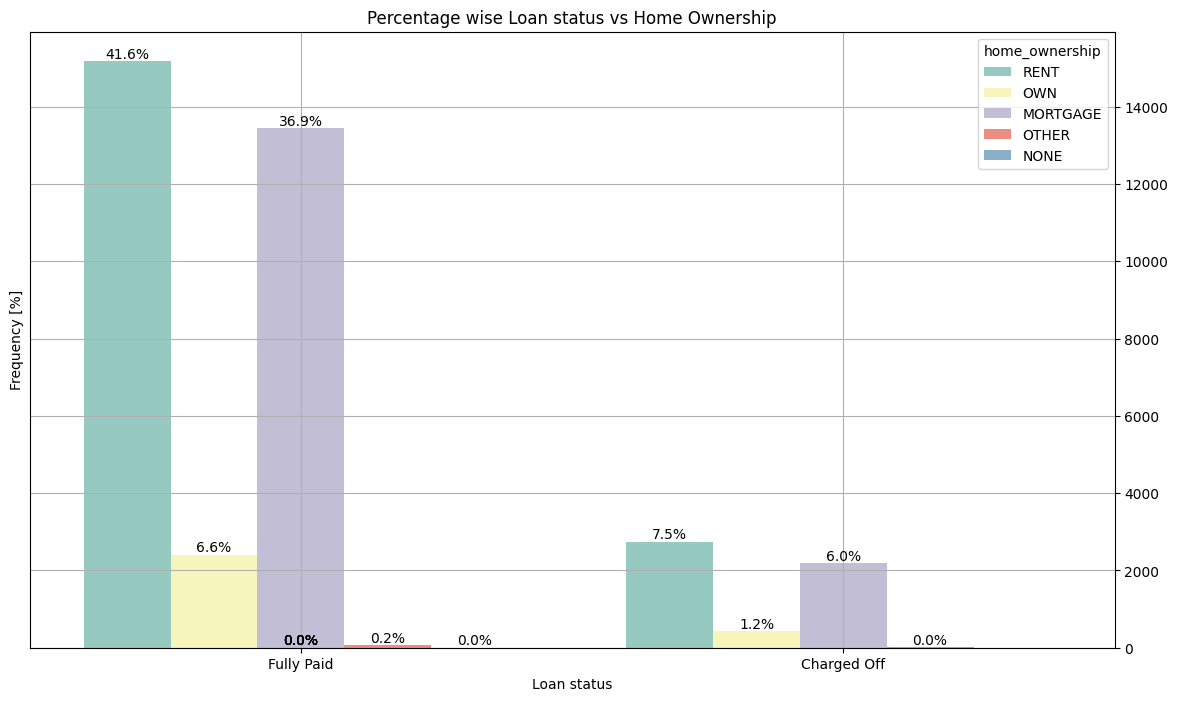

In [486]:
# Analyzing Home Ownership against loan_status
plt_graph(loan_df, "loan_status",'Loan status','Percentage wise Loan status vs Home Ownership','home_ownership')   

### So we see if home_ownership is either RENT or MORTGAGE then chances of becoming defaulter is higher. 

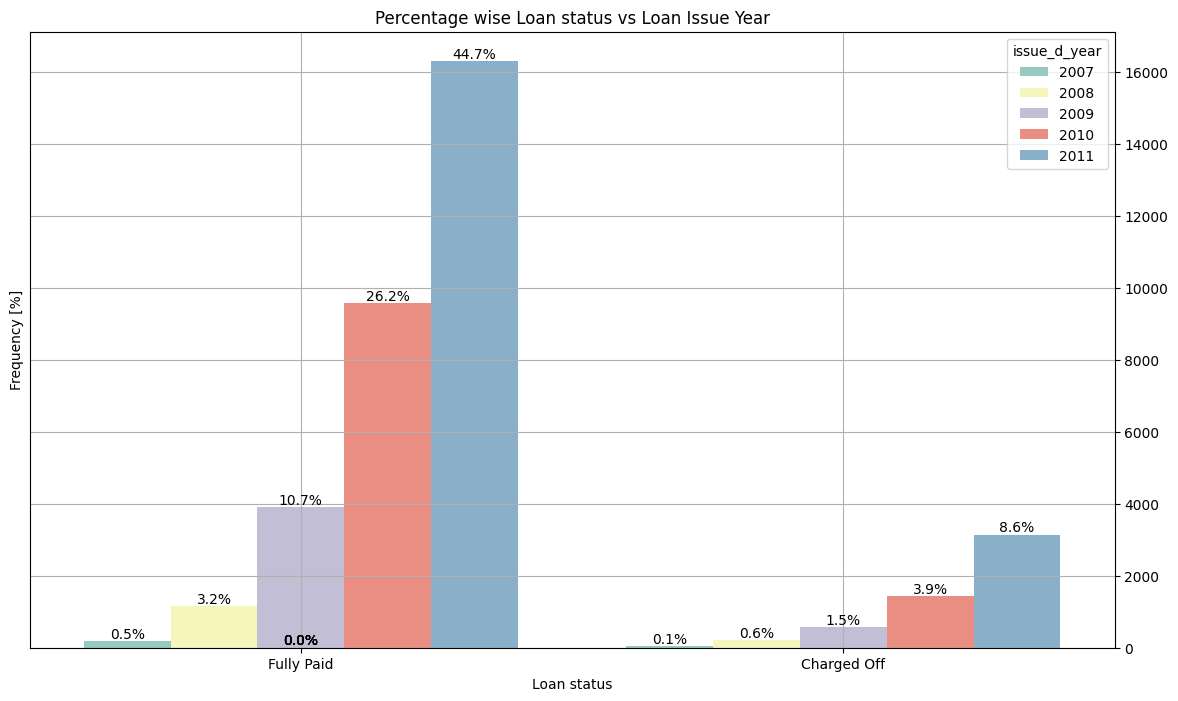

In [487]:
# Analyzing Loan Issue Year against loan_status
plt_graph(loan_df, "loan_status",'Loan status','Percentage wise Loan status vs Loan Issue Year','issue_d_year')   

### So we see for issue_d_year 2011 then chances of becoming defaulter is was higher. But this doesn't seems to be a useful data as its in past.


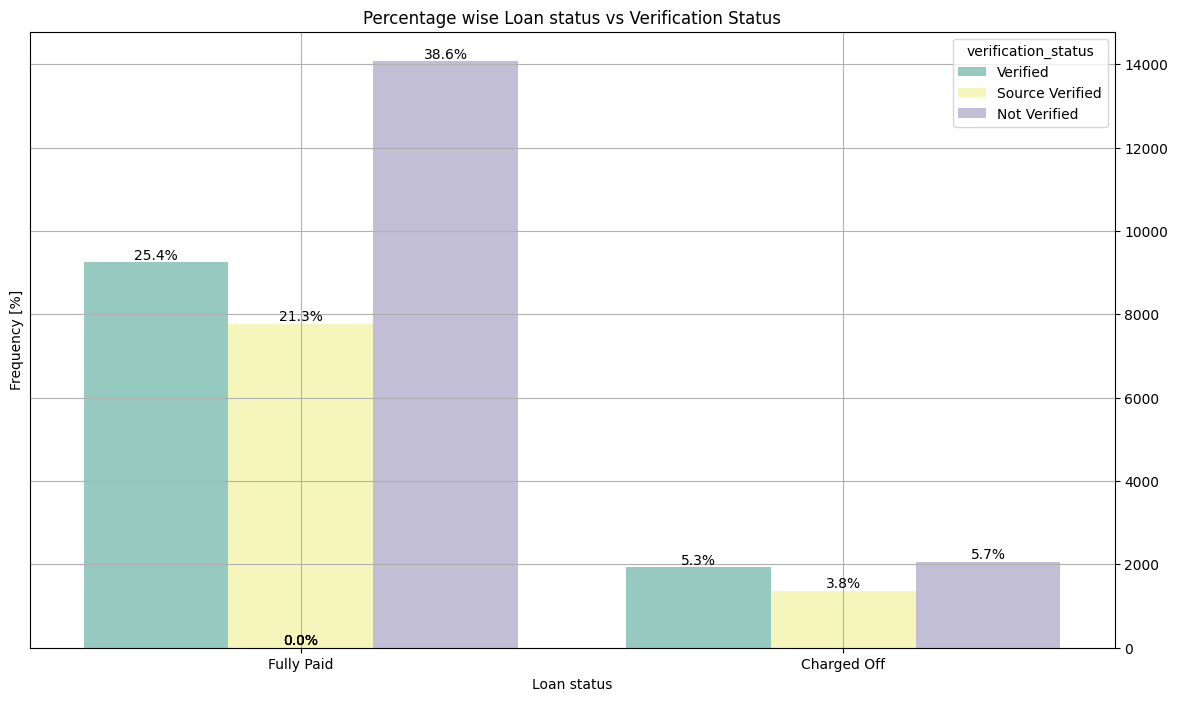

In [488]:
# Analyzing Verification Status against loan_status
plt_graph(loan_df, "loan_status",'Loan status','Percentage wise Loan status vs Verification Status','verification_status')   

### So we see if verification_status is not verified then chances of becoming defaulter is higher. 

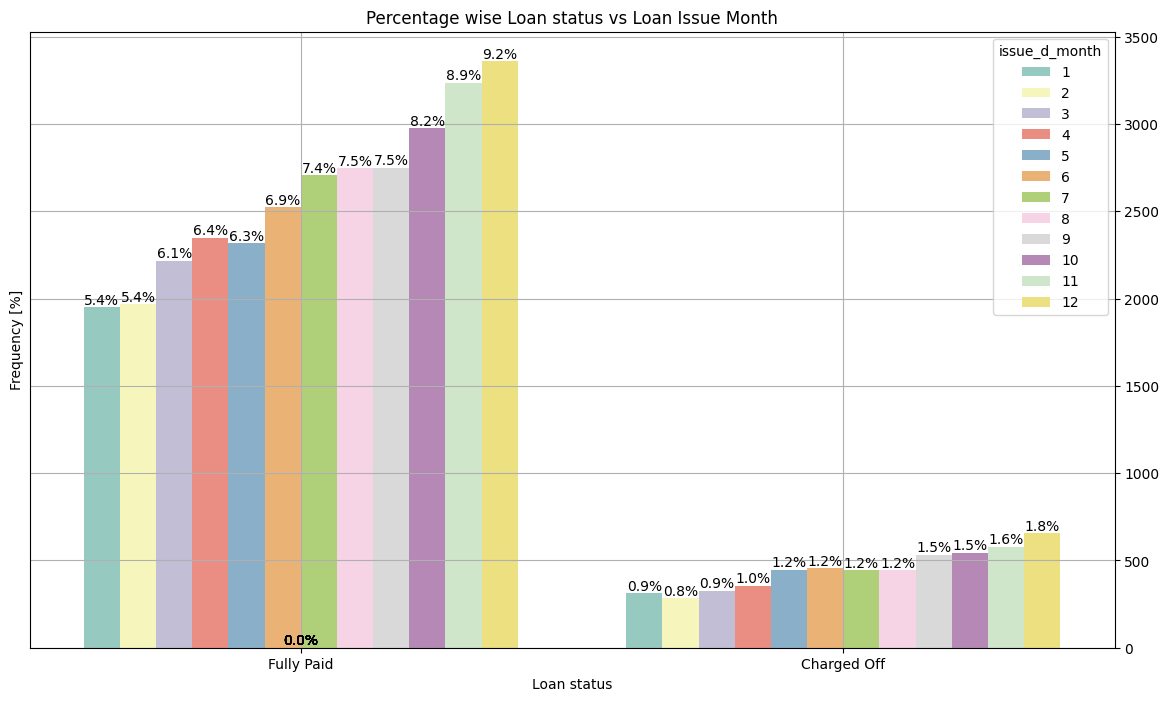

In [489]:
# Analyzing Loan Issue Month agaist loan_status
plt_graph(loan_df, "loan_status",'Loan status','Percentage wise Loan status vs Loan Issue Month','issue_d_month')   

### We see if months are either Sep, Oct, Nov or Dec then chances of becoming defaulter is high.

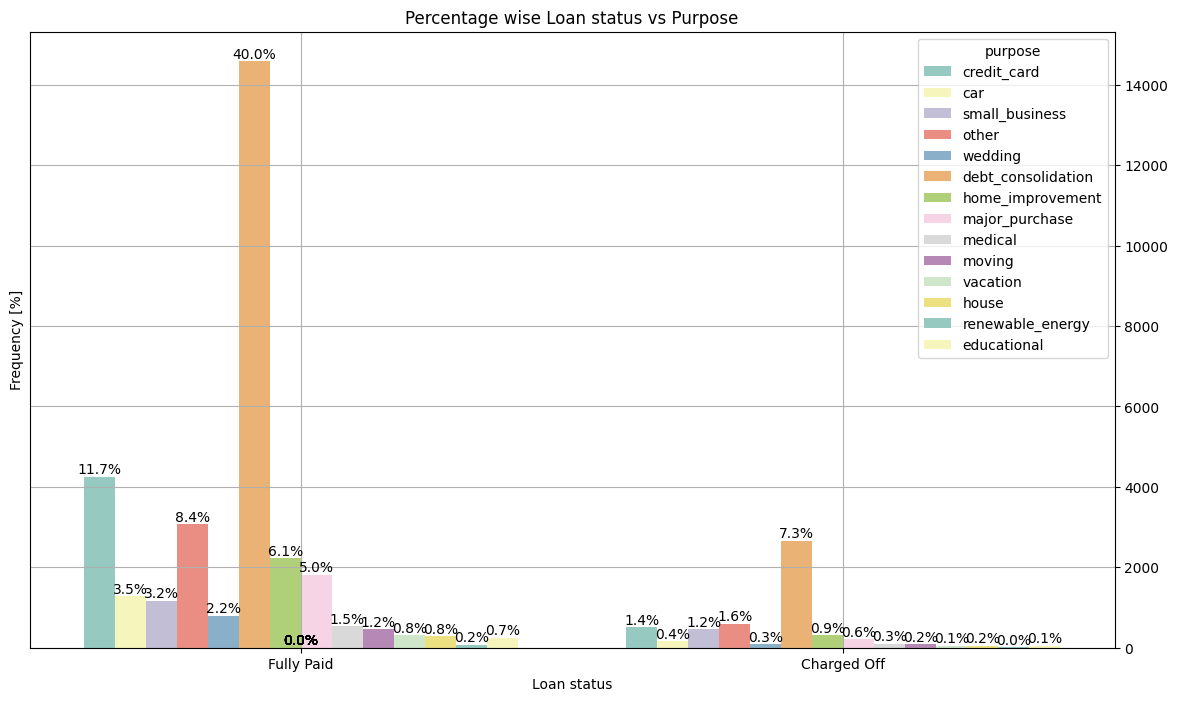

In [490]:
# Analyzing Purpose against loan_status
plt_graph(loan_df, "loan_status",'Loan status','Percentage wise Loan status vs Purpose','purpose')   

### We see if purpose is debt_consolidation then chances of becoming defaulter is higher. 

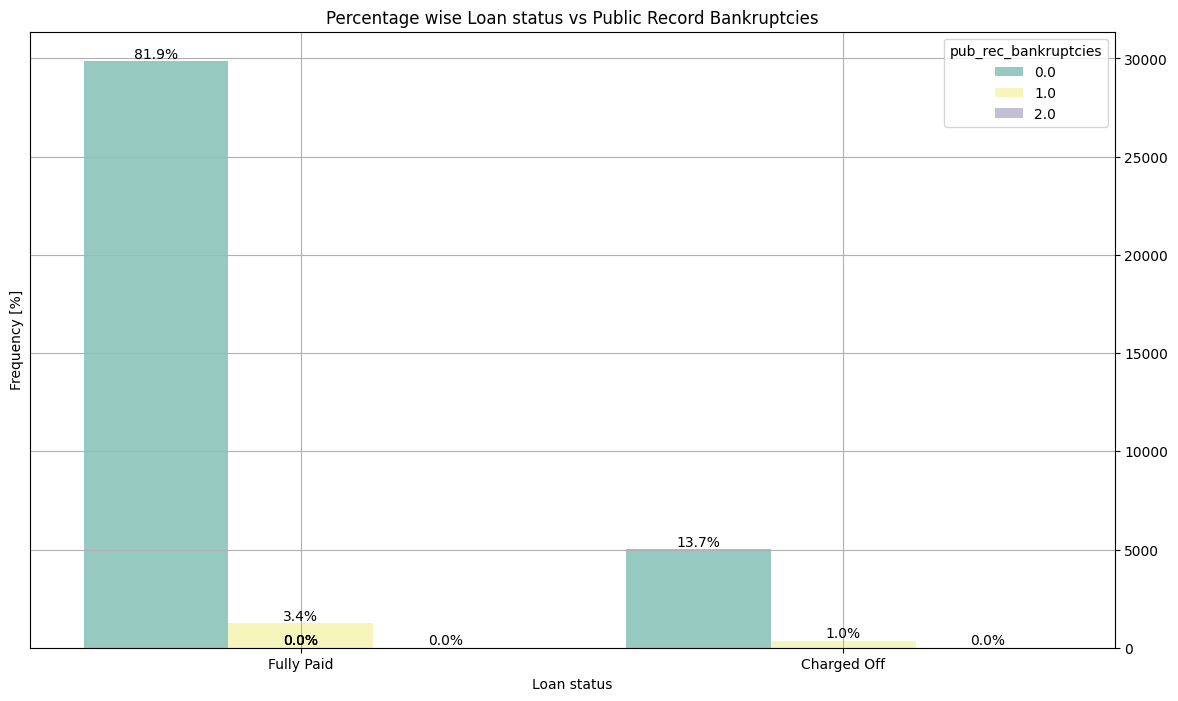

In [491]:
# Analyzing Number of pub_rec_bankruptcies against loan_status
plt_graph(loan_df, "loan_status",'Loan status','Percentage wise Loan status vs Public Record Bankruptcies','pub_rec_bankruptcies')   

### We see if pub_rec_bankruptcies is 0 then chances of becoming defaulter is higher. This seems some off data analysis. 

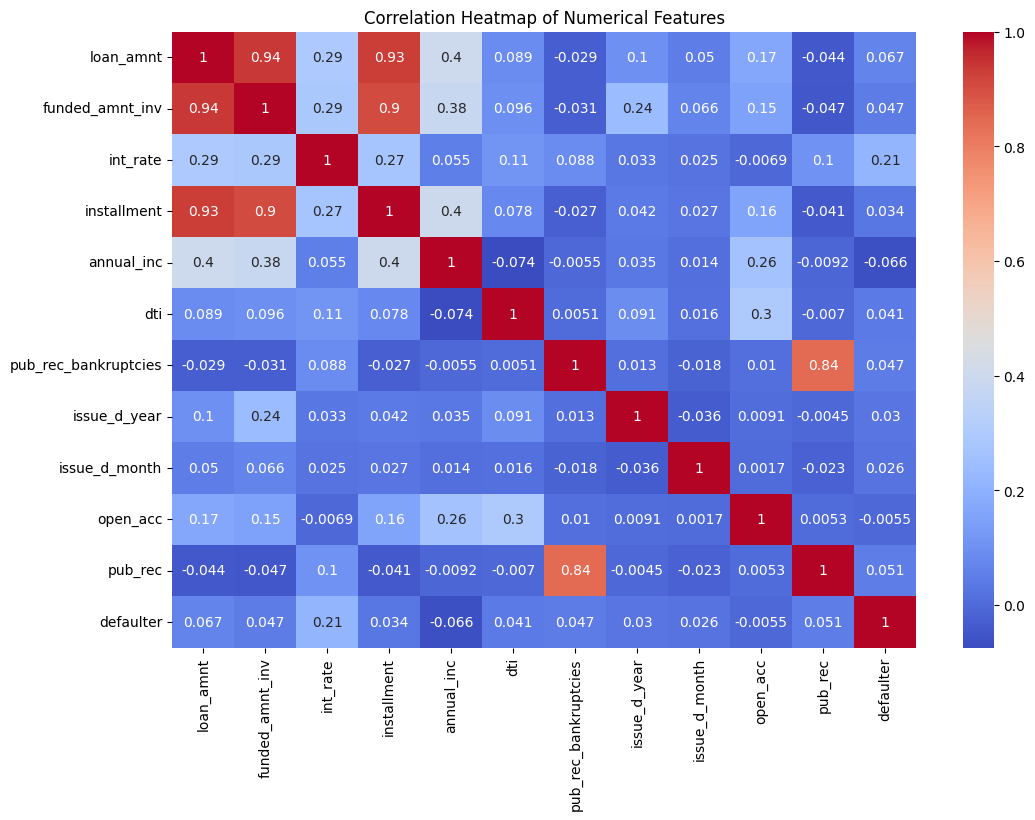

In [492]:
# Lets check the heatmap too for correlations 
# for variables - loan_amnt, funded_amnt_inv, int_rate, installment, annual_inc, dti, pub_rec_bankruptcies, 
# issue_d_year, issue_d_month, defaulter
corelated_cols = [ 'loan_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 
                   'pub_rec_bankruptcies', 'issue_d_year', 'issue_d_month', 'open_acc', 
                   'pub_rec', 'defaulter' 
                 ]
corr = loan_df[corelated_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

### From above correlation heatmap - we see
 - int_rate is postively co-related to defaulter
 - There are others factors too but not very strogly correlated.

### If we convert other variables to numeric type and feed the information to heatmap then we can get some more correlations

In [493]:
# Converting object type to int for term feature
loan_df['term'] = [int(x) for x in loan_df['term']] 

# Converting object type to int for term feature
# First we are making < 1 year as 0 year and 10+ years as 10
loan_df['emp_length'] = loan_df['emp_length'].map(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0]))
loan_df['emp_length'] = [int(x) for x in loan_df['emp_length']] 

# Converting grade to A to G, A=65 , B=66 ...
loan_df['grade'] = [ord(x) for x in loan_df['grade']] 

# Converting home_owner type to int
home_ownership_map = {
    'RENT': 1,
    'MORTGAGE': 2,
    'NONE': 3,
    'OTHER': 4,
    'OWN': 5
}
loan_df['home_ownership'] = [home_ownership_map[x] for x in loan_df['home_ownership']]

# Converting verification type to int
verification_map = {
    'Verified': 1,
    'Not Verified': 2,
    'Source Verified': 3
}
loan_df['verification_status'] = [verification_map[x] for x in loan_df['verification_status']]

# Converting purpose type to int
# set(loan_df.purpose.to_list()) gives list of unique values
purpose_type_map = {
 'car' : 1,
 'credit_card' : 2,
 'debt_consolidation': 3,
 'educational': 4,
 'home_improvement': 5,
 'house': 6,
 'major_purchase': 7,
 'medical': 8,
 'moving': 9,
 'other': 10,
 'renewable_energy': 11,
 'small_business': 12,
 'vacation': 13,
 'wedding': 14
}
loan_df['purpose'] = [purpose_type_map[x] for x in loan_df['purpose']]

# Converting state to int
all_states = set(loan_df.addr_state.to_list())
states_map = {}
i = 1 
for state in all_states:
    states_map[state] = i
    i += 1
loan_df['addr_state'] = [states_map[x] for x in loan_df['addr_state']]

# Lets give sub_grade an int value 
all_grades = set(loan_df.sub_grade.to_list())
sub_grade_map = {}
i = 1 
for grade in all_grades:
    sub_grade_map[grade] = i
    i += 1
loan_df['sub_grade'] = [sub_grade_map[x] for x in loan_df['sub_grade']]

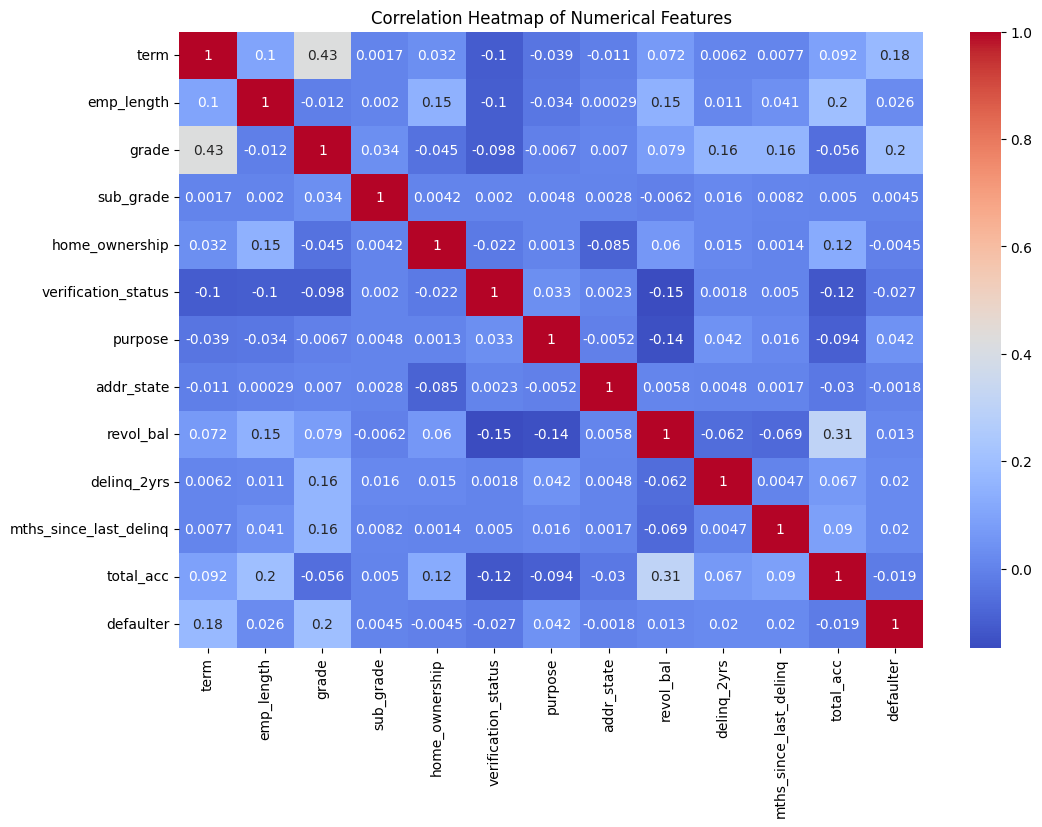

In [498]:
# Lets see the correlation with new variable
corelated_cols = ['term', 'emp_length', 'grade', 'sub_grade', 'home_ownership',
                  'verification_status', 'purpose', 'addr_state', 'revol_bal',
                  'delinq_2yrs', 'mths_since_last_delinq', 'total_acc', 'defaulter'
                 ]
corr = loan_df[corelated_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

### From above correlation heatmap we see
 - term and grade are positively related to defaulter
 - other variables are not strongly correlated.

### So all positively correlated variables of being defaulter are
- int_rate
- term
- grade

These three variables are already analysed against Charged Off.

### There are negitelvely correlated variables too but the corr is very weak. so not considering them at this moment.
We feel at this time we should speak with LC and get more data to further clean/analyse this.

## Summary & Analysis 

- There is positive correlation between Charged Off(defaulter) and 3 variables (int_rate, term, grade).
- Chances of becoming deafulter is higher if 
    - home_ownership is either RENT or Mortgage
    - funded_amnt_inv is between 5001-10000
    - int_rate rate is in range of 11% to 15%
    - annual_inc is in range of 40001 to 60000
    - dti is in range of either 11-15 or 16-20
    - months are either Sep, Oct, Nov or Dec
    - term is 36 months
    - grade is B or C
    - employees have exp 10+ years or < 1 year 
    - verification_status is not verified
    - purpose is debt_consolidation